In [1]:
import torch
import torch.nn as nn
import numpy as np

##**The Transformers Architecture**

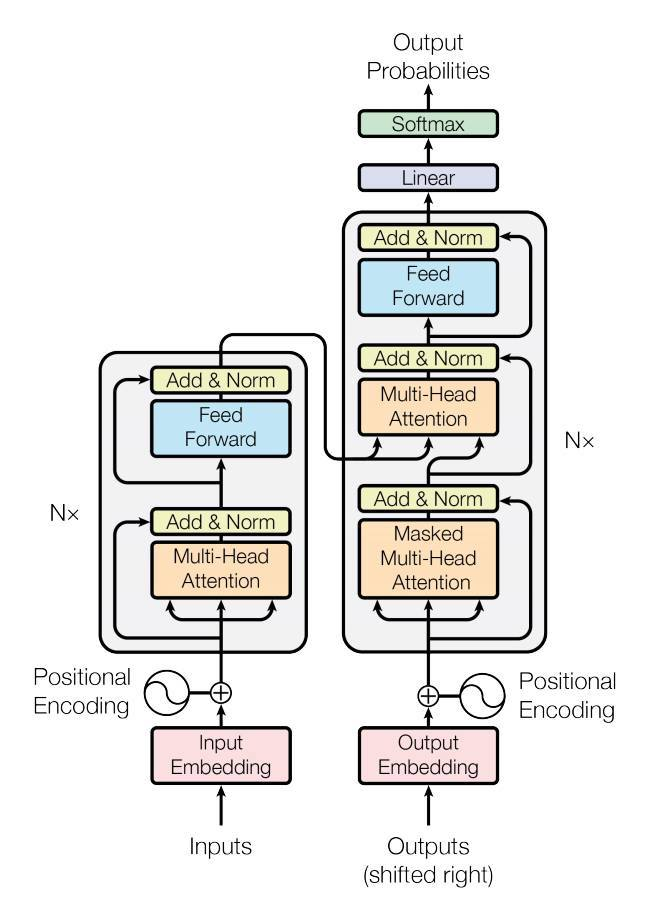

In [2]:
sample_english_text = [
    "Yash is a good guy and he likes to play badminton.",
    "I love to experiment with latest AI technologies,",
    "My hindi is good and english too,",
    "Elon musk is a fraud, he banned bitcoin for his own profit."
]

sample_hindi_text = [
    "Yash ek bahut acha ladka hai aur use badminton khelna bahut acha lagta hai.",
    "Mujhe nayi AI praudyogikee ke saath prayog karna pasand hai.",
    "Meri hindi achi hai aur angrezi achi hai.",
    "Elon musk is dhokebaaz vyakti hai, usne bitcoin pe pratibandh lagaya apne phaayede ke liye."
]

In [4]:
# tokenizing sentences
import nltk
from nltk.tokenize import word_tokenize

# nltk.download('wordnet')
# nltk.download('punkt')

tokenized_english_sentences = []
tokenized_hindi_sentences = []

for i in range(len(sample_english_text)):
    tokenized_english_sentences.append(word_tokenize(sample_english_text[i]))
print(tokenized_english_sentences)

for i in range(len(sample_hindi_text)):
    tokenized_hindi_sentences.append(word_tokenize(sample_hindi_text[i]))
print(tokenized_hindi_sentences)

[['Yash', 'is', 'a', 'good', 'guy', 'and', 'he', 'likes', 'to', 'play', 'badminton', '.'], ['I', 'love', 'to', 'experiment', 'with', 'latest', 'AI', 'technologies', ','], ['My', 'hindi', 'is', 'good', 'and', 'english', 'too', ','], ['Elon', 'musk', 'is', 'a', 'fraud', ',', 'he', 'banned', 'bitcoin', 'for', 'his', 'own', 'profit', '.']]
[['Yash', 'ek', 'bahut', 'acha', 'ladka', 'hai', 'aur', 'use', 'badminton', 'khelna', 'bahut', 'acha', 'lagta', 'hai', '.'], ['Mujhe', 'nayi', 'AI', 'praudyogikee', 'ke', 'saath', 'prayog', 'karna', 'pasand', 'hai', '.'], ['Meri', 'hindi', 'achi', 'hai', 'aur', 'angrezi', 'achi', 'hai', '.'], ['Elon', 'musk', 'is', 'dhokebaaz', 'vyakti', 'hai', ',', 'usne', 'bitcoin', 'pe', 'pratibandh', 'lagaya', 'apne', 'phaayede', 'ke', 'liye', '.']]


####**Generating Vocabulary**

In [5]:
import re
from collections import Counter

def split_sentence(sentence):
    return list(filter(lambda x: len(x) > 0, re.split('\W+', sentence.lower())))

def generate_vocabulary(train_captions, min_threshold):
    """
    Return {token: index} for all train tokens (words) that occur min_threshold times or more, 
        `index` should be from 0 to N, where N is a number of unique tokens in the resulting dictionary.
    """  
    #convert the list of whole captions to one string
    concat_str = ' '.join([str(elem).strip('\n') for elem in train_captions]) 
    #divide the string tokens (individual words), by calling the split_sentence function 
    individual_words = split_sentence(concat_str)
    #create a list of words that happen min_threshold times or more in that string  
    condition_keys = sorted([key for key, value in Counter(individual_words).items() if value >= min_threshold])
    #generate the vocabulary(dictionary)
    result = dict(zip(condition_keys, range(len(condition_keys))))
    return result

In [6]:
english_src_vocab = generate_vocabulary(sample_english_text, min_threshold=1)
hindi_trg_vocab = generate_vocabulary(sample_hindi_text, min_threshold=1)

In [7]:
print(english_src_vocab)
print(hindi_trg_vocab)

{'a': 0, 'ai': 1, 'and': 2, 'badminton': 3, 'banned': 4, 'bitcoin': 5, 'elon': 6, 'english': 7, 'experiment': 8, 'for': 9, 'fraud': 10, 'good': 11, 'guy': 12, 'he': 13, 'hindi': 14, 'his': 15, 'i': 16, 'is': 17, 'latest': 18, 'likes': 19, 'love': 20, 'musk': 21, 'my': 22, 'own': 23, 'play': 24, 'profit': 25, 'technologies': 26, 'to': 27, 'too': 28, 'with': 29, 'yash': 30}
{'acha': 0, 'achi': 1, 'ai': 2, 'angrezi': 3, 'apne': 4, 'aur': 5, 'badminton': 6, 'bahut': 7, 'bitcoin': 8, 'dhokebaaz': 9, 'ek': 10, 'elon': 11, 'hai': 12, 'hindi': 13, 'is': 14, 'karna': 15, 'ke': 16, 'khelna': 17, 'ladka': 18, 'lagaya': 19, 'lagta': 20, 'liye': 21, 'meri': 22, 'mujhe': 23, 'musk': 24, 'nayi': 25, 'pasand': 26, 'pe': 27, 'phaayede': 28, 'pratibandh': 29, 'praudyogikee': 30, 'prayog': 31, 'saath': 32, 'use': 33, 'usne': 34, 'vyakti': 35, 'yash': 36}


####**Max Sentence Length**

In [8]:
# finding avg len of english texts
src_lens = []
for sentence in tokenized_english_sentences:
    src_lens.append(len(sentence))

# finding avg len of english texts
trg_lens = []
for sentence in tokenized_hindi_sentences:
    trg_lens.append(len(sentence))

print("Maximum English source sentence length:", max(src_lens))
print("Maximum Hindi target sentence length:", max(trg_lens))

Maximum English source sentence length: 14
Maximum Hindi target sentence length: 17


####**Hyper-parameters**

In [9]:
BATCH_SIZE = len(tokenized_english_sentences)
EMBEDDING_SIZE = 100
PAD_TOKEN = '<PAD>'
PAD_TOKEN_IDX = 101
MAX_ENGLISH_SENTENCE_LEN = 15
MAX_HINDI_SENTENCE_LEN = 20

####**Padding Texts**

In [15]:
# padding texts
def pad_texts(tokenized_sentences, max_len):
    
    padded_texts = [None]*len(tokenized_sentences)

    for i in range(len(tokenized_sentences)):
        if len(tokenized_sentences[i]) < max_len:
            extra_len_to_padd = max_len - len(tokenized_sentences[i])
            temp = []
            temp = tokenized_sentences[i]
            for _ in range(extra_len_to_padd):
                temp.append(PAD_TOKEN)
            padded_texts[i] = temp
    
    return padded_texts

english_padded_texts = pad_texts(tokenized_english_sentences, MAX_ENGLISH_SENTENCE_LEN)
hindi_padded_texts = pad_texts(tokenized_hindi_sentences, MAX_HINDI_SENTENCE_LEN)

print(english_padded_texts)
print(hindi_padded_texts)

[['Yash', 'is', 'a', 'good', 'guy', 'and', 'he', 'likes', 'to', 'play', 'badminton', '.', '<PAD>', '<PAD>', '<PAD>'], ['I', 'love', 'to', 'experiment', 'with', 'latest', 'AI', 'technologies', ',', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>'], ['My', 'hindi', 'is', 'good', 'and', 'english', 'too', ',', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>'], ['Elon', 'musk', 'is', 'a', 'fraud', ',', 'he', 'banned', 'bitcoin', 'for', 'his', 'own', 'profit', '.', '<PAD>']]
[['Yash', 'ek', 'bahut', 'acha', 'ladka', 'hai', 'aur', 'use', 'badminton', 'khelna', 'bahut', 'acha', 'lagta', 'hai', '.', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>'], ['Mujhe', 'nayi', 'AI', 'praudyogikee', 'ke', 'saath', 'prayog', 'karna', 'pasand', 'hai', '.', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>'], ['Meri', 'hindi', 'achi', 'hai', 'aur', 'angrezi', 'achi', 'hai', '.', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', 

####**Converting words to integer tokens i.e. word to index**

In [91]:
def convert2tokens(padded_texts, vocab):
    word2idx = []
    for item in padded_texts:
        temp = []
        for word in item:
            if word.lower() in vocab:
                temp.append(vocab[word.lower()])
            else: temp.append(PAD_TOKEN_IDX)
        word2idx.append(temp)
    return word2idx

src_tokens = convert2tokens(english_padded_texts, english_src_vocab)
trg_tokens = convert2tokens(hindi_padded_texts, hindi_trg_vocab)

print(src_tokens)
print(trg_tokens)

[[30, 17, 0, 11, 12, 2, 13, 19, 27, 24, 3, 101, 101, 101, 101], [16, 20, 27, 8, 29, 18, 1, 26, 101, 101, 101, 101, 101, 101, 101], [22, 14, 17, 11, 2, 7, 28, 101, 101, 101, 101, 101, 101, 101, 101], [6, 21, 17, 0, 10, 101, 13, 4, 5, 9, 15, 23, 25, 101, 101]]
[[36, 10, 7, 0, 18, 12, 5, 33, 6, 17, 7, 0, 20, 12, 101, 101, 101, 101, 101, 101], [23, 25, 2, 30, 16, 32, 31, 15, 26, 12, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101], [22, 13, 1, 12, 5, 3, 1, 12, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101], [11, 24, 14, 9, 35, 12, 101, 34, 8, 27, 29, 19, 4, 28, 16, 21, 101, 101, 101, 101]]


####**Manually Generating Embeddings**

It's just an example of how would you create your own embeddings, but I will be using nn.Embedding layer.

In [10]:
def generate_embeddings(BATCH_SIZE, EMBEDDING_SIZE, MAX_LEN):
    # creating empty embeddings tensor
    word2vec_embeddings = torch.zeros(
        BATCH_SIZE,
        EMBEDDING_SIZE,
        MAX_LEN
    )

    # generating english embeddings
    for i in range(len(word2vec_embeddings)):
        final_embeddings = torch.zeros(EMBEDDING_SIZE, MAX_LEN)
        for index, word in enumerate(english_padded_texts[i]):
            curr_embeddings = torch.randn(EMBEDDING_SIZE) # weights.get_vector(word)
            final_embeddings[:, index] = curr_embeddings
        word2vec_embeddings[i, :, :] = final_embeddings
    
    return word2vec_embeddings # (4, 100, 15)

####**Positional Encodings**

Let's add positional encodings

The basics of positional encodings is that it gives a meaning of where the words are placed in the sentence.

even = sin, odd = cos

In [11]:
def generate_positional_embeddings(BATCH_SIZE, MAX_LEN, EMBEDDING_SIZE):
    pos = torch.arange(MAX_LEN, dtype=torch.float).reshape(1, -1, 1)
    dim = torch.arange(EMBEDDING_SIZE, dtype=torch.float).reshape(1, 1, -1)
    phase = pos / 1e4 ** (dim // EMBEDDING_SIZE)
    return torch.where(dim.long() % 2 == 0, torch.sin(phase), torch.cos(phase)).reshape(1, -1, MAX_LEN).expand(BATCH_SIZE, -1, -1) # (4, 100, 15)

####**Final Input Embeddings for Transformer input**

Final input embeddings = word embeddings + positional encodings

(Do remember we have to do this same process for our target sentences i.e. hindi sentences)

In [12]:
# let's add these positional encodings for each sentence
def prepare_final_input(BATCH_SIZE, MAX_LEN, EMBEDDING_SIZE):
    word_embeddings = generate_embeddings(BATCH_SIZE, EMBEDDING_SIZE, MAX_LEN)
    positional_embeddings = generate_positional_embeddings(BATCH_SIZE, MAX_LEN, EMBEDDING_SIZE)
    
    final_input_embeddings = torch.zeros(BATCH_SIZE, EMBEDDING_SIZE, MAX_LEN)
    final_input_embeddings = word_embeddings + positional_embeddings
    return final_input_embeddings # (4, 100, 15)

In [16]:
src_input_embeddings = prepare_final_input(BATCH_SIZE, MAX_ENGLISH_SENTENCE_LEN, EMBEDDING_SIZE)
trg_input_embeddings = prepare_final_input(BATCH_SIZE, MAX_HINDI_SENTENCE_LEN, EMBEDDING_SIZE)

In [17]:
src_input_embeddings.shape, trg_input_embeddings.shape

(torch.Size([4, 100, 15]), torch.Size([4, 100, 20]))

Now we have to create 3 identical tensors which are Key, Value and Queries Vectors, but before that let's implement it for Multi-Head Self-Attention.

Multi-Head basically means that in our case the embedding size is 100, so if we set our heads to 4, then each embedding will be of 25 dimension (100 // 25). (Also it needs to be integer division).

###**Self-Attention Block**

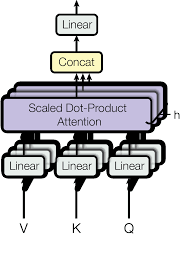

In [60]:
class SelfAttention(nn.Module):
    def __init__(self, EMBEDDING_SIZE, heads, MAX_ENGLISH_SENTENCE_LEN):
        super(SelfAttention, self).__init__()

        self.heads = heads
        self.head_dim = EMBEDDING_SIZE // heads # 100//4 = 25

        self.values_weights = nn.Linear(self.head_dim, self.head_dim, bias=False) # (25, 25)
        self.keys_weights = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries_weights = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.out = nn.Linear(EMBEDDING_SIZE, EMBEDDING_SIZE)

    def forward(self, values, keys, queries, mask):
        '''
        values : final_input_embeddings
        keys : final_input_embeddings
        queries : final_input_embeddings
        '''
        num_samples = queries.shape[0]
        
        # splitting embedding into 4 heads
        values = values.reshape(num_samples, MAX_ENGLISH_SENTENCE_LEN, self.heads, self.head_dim) # (4,15,4,25)
        keys = keys.reshape(num_samples, MAX_ENGLISH_SENTENCE_LEN, self.heads, self.head_dim) # (4,15,4,25)
        queries = queries.reshape(num_samples, MAX_ENGLISH_SENTENCE_LEN, self.heads, self.head_dim) # (4,15,4,25)

        # k,q,v linear
        v = self.values_weights(values) # (4, 15, 4, 25)
        k = self.keys_weights(keys) # (4, 15, 4, 25)
        q = self.queries_weights(queries) # (4, 15, 4, 25)

        # reshaping q,k,v for scaled-dot product to shape : (16, 15, 25)
        k = k.transpose(1, 2).contiguous().view(num_samples * self.heads, MAX_ENGLISH_SENTENCE_LEN, self.head_dim)
        v = v.transpose(1, 2).contiguous().view(num_samples * self.heads, MAX_ENGLISH_SENTENCE_LEN, self.head_dim)
        q = q.transpose(1, 2).contiguous().view(num_samples * self.heads, MAX_ENGLISH_SENTENCE_LEN, self.head_dim)

        # scaled-dot product
        dot = torch.bmm(q, k.transpose(1, 2)) # (16, 15, 15)
        if mask is not None:
            dot = dot.masked_fill(mask == 0, float("-1e20"))

        dot = dot / np.sqrt(self.head_dim)
        attention = torch.softmax(dot, dim=2)
        z = torch.bmm(attention, v).view(num_samples, MAX_ENGLISH_SENTENCE_LEN, self.heads, self.head_dim) # (4, 15, 4, 25)
        z = z.transpose(1,2).contiguous().view(num_samples, MAX_ENGLISH_SENTENCE_LEN, self.heads*self.head_dim) # (4,15,100)
        out = self.out(z) # (4, 15, 100)
        return out

###**Transformer Block**

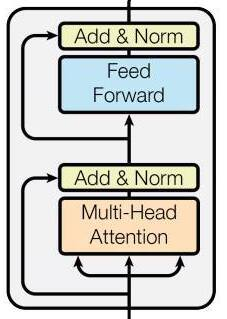

In [70]:
class TransformerBlock(nn.Module):
    def __init__(self, EMBEDDING_SIZE, max_src_seq_len, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()

        self.attention = SelfAttention(EMBEDDING_SIZE, heads, max_src_seq_len)
        self.layerNormalization1 = nn.LayerNorm(EMBEDDING_SIZE)
        self.feed_forward = nn.Sequential(
            nn.Linear(EMBEDDING_SIZE, forward_expansion*EMBEDDING_SIZE),
            nn.ReLU(),
            nn.Linear(forward_expansion*EMBEDDING_SIZE, EMBEDDING_SIZE)
        )
        self.layerNormalization2 = nn.LayerNorm(EMBEDDING_SIZE)
        self.dropout = nn.Dropout(dropout)

    def forward(self, values, keys, queries, mask):
        
        attention = self.attention(values, keys, queries, mask)
        norm1 = self.layerNormalization1(attention + queries.transpose(1, 2))
        norm1 = self.dropout(norm1)
        forward = self.feed_forward(norm1)
        norm2 = self.layerNormalization2(forward + norm1)
        norm2 = self.dropout(norm2)
        return norm2

###**Transformer Encoder**

These are just a stack of Transformer Block

In [71]:
class TransformerEncoder(nn.Module):
    def __init__(self, embed_size, num_layers, heads, forward_expansion, dropout, max_len, device):
        super(TransformerEncoder, self).__init__()

        self.device = device
        self.embed_size = embed_size
        # self.word_embedding = nn.Embedding(src_vocab_size, embed_size)
        # self.positional_embedding = nn.Embedding(max_len, embed_size)
        self.embeddings = prepare_final_input(BATCH_SIZE, max_len, embed_size)

        self.layers = nn.ModuleList(
            [
                TransformerBlock(
                    EMBEDDING_SIZE=self.embed_size,
                    max_src_seq_len=max_len,
                    heads=heads,
                    dropout=dropout,
                    forward_expansion=forward_expansion
                ) 
                for _ in range(num_layers)
            ]
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        
        # N, seq_len = x.shape
        # positions = torch.arange(0, seq_len).expand(N, seq_len).to(self.device)
        # out = self.word_embedding(x) + self.positional_embedding(positions)
        out = self.dropout(self.embeddings)

        for layer in self.layers:
            norm2_out = layer(out, out, out, mask)
        
        return norm2_out

In [74]:
# Testing Transformer Encoder 
transformer_encoder = TransformerEncoder(EMBEDDING_SIZE, 2, 2, 2, 0.1, MAX_ENGLISH_SENTENCE_LEN, "cuda")
output = transformer_encoder(src_input_embeddings, None)
print(output.shape)

torch.Size([4, 15, 100])


###**Transformer Decoder Block**

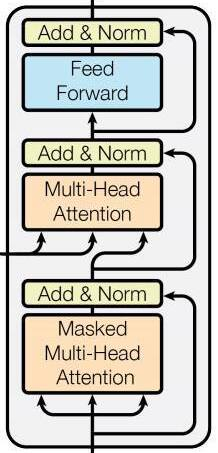

In [21]:
class TransformerDecoderBlock(nn.Module):
    def __init__(self, embed_size, heads, forward_expansion, max_len, dropout, device):
        super(TransformerDecoder, self).__init__()

        self.attention = SelfAttention(embed_size, heads, max_len)
        self.norm = nn.LayerNorm(embed_size)
        self.transformer_block = TransformerBlock(embed_size, max_len, heads, dropout, forward_expansion)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, value, key, src_mask, trg_mask):
        '''
        x (required) : Input from target (target sentences)
        value, key (required) : Transformer Encoder output
        src_mask (optional) : Mask used to ignore padded values to avoid unnecessary computations
        trg_mask (required) : Mask used for decoder block to avoid looking at future tokens 
        '''
        attention = self.attention(x, x, x, trg_mask)
        query = self.norm(attention + x)
        query = self.dropout(query)
        out = transformer_block(value, key, query, src_mask)
        return out

###**Transformer Decoder**

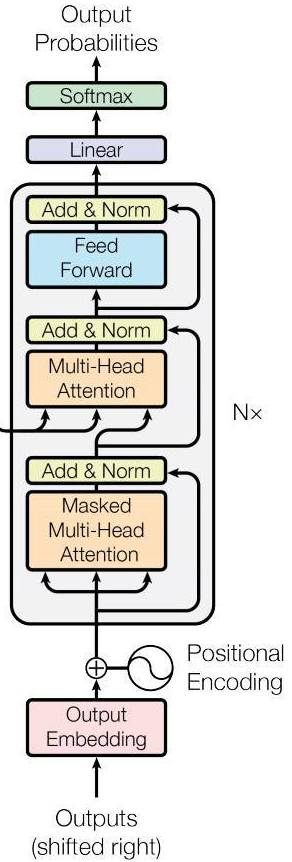

In [22]:
class TransformerDecoder(nn.Module):
    def __init__(self, trg_vocab_size, embed_size, num_layers, heads, forward_expansion, dropout, max_len, device):
        super(TransformerDecoder, self).__init__()

        self.device = device
        self.word_embeddings = nn.Embedding(trg_vocab_size, embed_size)
        self.positional_embeddings = nn.Embedding(max_len, embed_size)

        self.layers = nn.ModuleList(
            [
                TransformerDecoderBlock(
                    embed_size=embed_size,
                    heads=heads,
                    forward_expansion=forward_expansion,
                    max_len=max_len,
                    dropout=dropout,
                    device=device
                )
                for _ in range(num_layers)
            ]
        )

        self.fc_out = nn.Linear(embed_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x, enc_out, src_mask, trg_mask):
        N, seq_len = x.shape
        positions = torch.arange(0, seq_len).expand(N, seq_len).to(self.device)

        out = self.word_embedding(x) + self.positional_embedding(positions)
        out = self.dropout(out)

        for layer in self.layers:
            norm3_out = layer(out, enc_out, enc_out, src_mask, trg_mask)
        
        fc_out = self.fc_out(norm3_out)
        return fc_out

##The Transformer - All Combined

In [28]:
class Transformer(nn.Module):
    def __init__(
        self,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        trg_pad_idx,
        embed_size=256,
        num_layers=4,
        forward_expansion=2,
        heads=8,
        dropout=0,
        device="cuda",
        max_len=20
    ):
        super(Transformer, self).__init__()

        self.encoder = TransformerEncoder(
            src_vocab_size=src_vocab_size,
            embed_size=embed_size,
            num_layers=num_layers,
            heads=heads,
            forward_expansion=forward_expansion,
            dropout=dropout,
            max_len=max_len,
            device=device
        )

        self.decoder = TransformerDecoder(
            trg_vocab_size=trg_vocab_size,
            embed_size=embed_size,
            num_layers=num_layers,
            heads=heads,
            forward_expansion=forward_expansion,
            dropout=dropout,
            max_len=max_len,
            device=device
        )

        self.device = device
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx

        def make_src_mask(self, src):
            src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2) # (N, 1, 1, src_len)
            return src_mask.to(device)
        
        def make_trg_mask(self, trg):
            N, trg_len = trg.shape
            trg_mask = torch.tril(torch.ones((trg_len, trg_len))).expand(N, 1, trg_len, trg_len)
            return trg_mask.to(device)

        def forward(self, src, trg):
            src_mask = make_src_mask(src)
            trg_mask = make_trg_mask(trg)

            enc_out = self.encoder(src, src_mask)
            dec_out = self.decoder(trg, enc_out, src_mask, trg_mask)
            return dec_out